# Symulator parametrów obwodowych obwodu ze sprzężeniem indukcyjnym

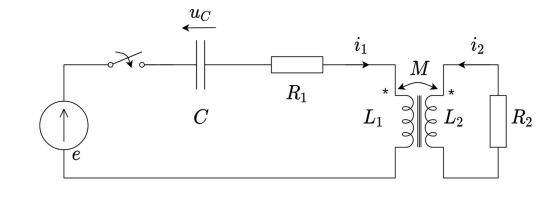

Wartość początkowa zmiennych stanu: <br />
* i1 = 0 [A]<br />
* i2 = 0 [A]<br />
* uc = 0 [V]<br />

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Część 1.

0 < t < 30 s

In [26]:
#Definicja zmiennych
h = 1e-5
t = np.arange(0,0.5,h)
y = np.array([[0],[0],[0]])

In [29]:
#podstawiamy i1=y1, i2=y2, uc=y3

def dy(y):
    R1 = 0.1
    R2 = 10
    C = 0.5
    L1 = 3
    L2 = 5
    M = 0.8
    D1 = L1/M - M/L2
    D2 = M/L1 - L2/M
    e=1
    
    matrix1 = np.matmul(np.array([[-R1/(M*D1), R2/(L2*D1), -1/(M*D1)],[-R1/(L1*D2), R2/(M*D2), -1/(L1*D2)],[1/C, 0, 0]]),y)
    matrix2 = np.array([[1/(M*D1)],[1/(L1*D2)],[0]])*e
    
    return matrix1+matrix2

In [30]:
dy(y)

array([[ 0.34818942],
       [-0.05571031],
       [ 0.        ]])